In [1]:
import sys
sys.path.append('../')

from prepare_data import PrepareData
from image_data_generator import DataGenerator
import numpy as np

In [2]:
x_train, y_train = PrepareData.load_set('train', '../data/processed/')
x_valid, y_valid = PrepareData.load_set('valid', '../data/processed/')

In [3]:
# data preparation
x_valid = x_valid / 255

In [4]:
print(x_train.shape)
print(y_train.shape)
print(x_valid.shape)
print(y_valid.shape)

(10000, 178, 178, 3)
(10000,)
(2000, 178, 178, 3)
(2000,)


# Model

In [5]:
from keras.models import Sequential
from keras.applications import InceptionV3
from keras import layers 
import keras

In [6]:
base_model = InceptionV3(
    include_top=False,
    weights='imagenet',
    input_shape=(178, 178, 3))

In [10]:
model = Sequential()
model.add(base_model)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

for layer in base_model.layers:
    # if isinstance(layer, layers.BatchNormalization):
    #     layer.trainable = True
    layer.trainable = False

In [11]:
train_gen = DataGenerator(
    images=x_train, 
    labels=y_train, 
    batch_size=64, 
    shuffle=False, 
    augment=False
)

early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    mode='min',
    verbose=True,
    patience=2
)

In [12]:
model1 = model
model1.compile(
    optimizer='adam', 
    loss='binary_crossentropy', 
    metrics=['accuracy']
)
history1 = model1.fit(
    train_gen, 
    epochs=10, 
    verbose=True,
    shuffle=True, 
    validation_data=(x_valid, y_valid),
    callbacks=[early_stop]
)

Epoch 1/10
156/156 [==============================] - 203s 1s/step - loss: 0.5997 - accuracy: 0.7020 - val_loss: 0.4909 - val_accuracy: 0.7680
Epoch 2/10
156/156 [==============================] - 197s 1s/step - loss: 0.4724 - accuracy: 0.7715 - val_loss: 0.4835 - val_accuracy: 0.7645
Epoch 3/10
156/156 [==============================] - 194s 1s/step - loss: 0.4375 - accuracy: 0.7949 - val_loss: 0.4481 - val_accuracy: 0.7825
Epoch 4/10
156/156 [==============================] - 190s 1s/step - loss: 0.4251 - accuracy: 0.7986 - val_loss: 0.4595 - val_accuracy: 0.7895
Epoch 5/10
156/156 [==============================] - 191s 1s/step - loss: 0.4143 - accuracy: 0.8061 - val_loss: 0.4356 - val_accuracy: 0.8010
Epoch 6/10
156/156 [==============================] - 189s 1s/step - loss: 0.4045 - accuracy: 0.8141 - val_loss: 0.4413 - val_accuracy: 0.7915
Epoch 7/10
156/156 [==============================] - 182s 1s/step - loss: 0.3872 - accuracy: 0.8241 - val_loss: 0.4418 - val_accuracy: 0.7965

In [13]:
model1.save('../saved_models/binary_model1')

INFO:tensorflow:Assets written to: ../saved_models/binary_model1\assets


INFO:tensorflow:Assets written to: ../saved_models/binary_model1\assets


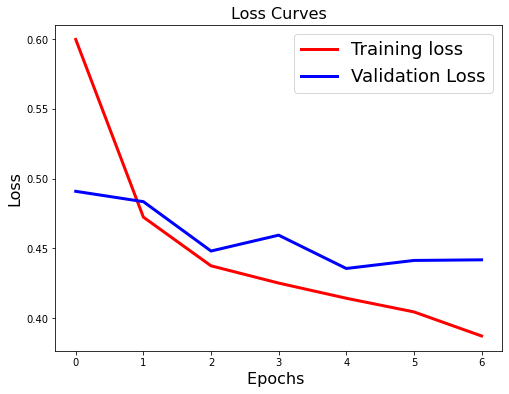

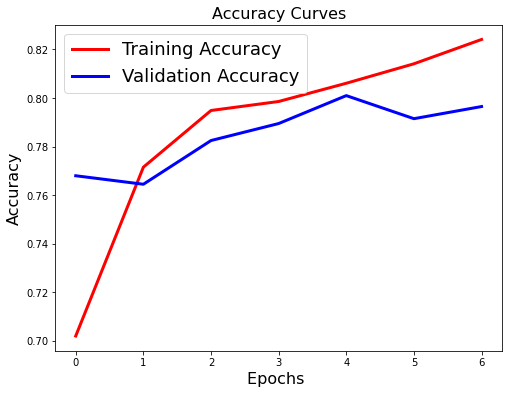

In [27]:
from build_model import plot_history

plot_history(history1)

In [14]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 4, 4, 2048)        21802784  
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense_1 (Dense)             (None, 128)               262272    
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 22,065,185
Trainable params: 262,401
Non-trainable params: 21,802,784
____________________________________

## Model with data augmentation

In [15]:
train_gen = DataGenerator(
    images=x_train, 
    labels=y_train, 
    batch_size=64, 
    shuffle=False, 
    augment=True
)

early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    mode='min',
    verbose=True,
    patience=2
)

model2 = model
model2.compile(
    optimizer='adam', 
    loss='binary_crossentropy', 
    metrics=['accuracy']
)
history2 = model2.fit(
    train_gen, 
    epochs=10, 
    verbose=True,
    shuffle=True, 
    validation_data=(x_valid, y_valid),
    callbacks=[early_stop]
)

Epoch 1/10
156/156 [==============================] - 248s 2s/step - loss: 0.4405 - accuracy: 0.7884 - val_loss: 0.4415 - val_accuracy: 0.8020
Epoch 2/10
156/156 [==============================] - 202s 1s/step - loss: 0.4368 - accuracy: 0.7919 - val_loss: 0.4386 - val_accuracy: 0.7945
Epoch 3/10
156/156 [==============================] - 206s 1s/step - loss: 0.4260 - accuracy: 0.7996 - val_loss: 0.4764 - val_accuracy: 0.7755
Epoch 4/10
156/156 [==============================] - 179s 1s/step - loss: 0.4185 - accuracy: 0.8017 - val_loss: 0.4248 - val_accuracy: 0.8070
Epoch 5/10
156/156 [==============================] - 182s 1s/step - loss: 0.4169 - accuracy: 0.8029 - val_loss: 0.4385 - val_accuracy: 0.7985
Epoch 6/10
156/156 [==============================] - 201s 1s/step - loss: 0.4099 - accuracy: 0.8065 - val_loss: 0.4422 - val_accuracy: 0.8085
Epoch 6: early stopping


In [16]:
model2.save('../saved_models/binary_model2')

INFO:tensorflow:Assets written to: ../saved_models/binary_model2\assets


INFO:tensorflow:Assets written to: ../saved_models/binary_model2\assets


In [17]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 4, 4, 2048)        21802784  
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense_1 (Dense)             (None, 128)               262272    
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 22,065,185
Trainable params: 262,401
Non-trainable params: 21,802,784
____________________________________

In [22]:
import pickle

with open('../saved_models/history/history_binary_model1.pkl', 'wb') as file:
    pickle.dump(history1, file)

INFO:tensorflow:Assets written to: ram://21ad001f-a186-4128-83b7-ef9b58c291d3/assets


INFO:tensorflow:Assets written to: ram://21ad001f-a186-4128-83b7-ef9b58c291d3/assets


In [23]:
with open('../saved_models/history/history_binary_model2.pkl', 'wb') as file:
    pickle.dump(history2, file)

INFO:tensorflow:Assets written to: ram://3aaf318d-ca6a-432c-b865-013673a453e2/assets


INFO:tensorflow:Assets written to: ram://3aaf318d-ca6a-432c-b865-013673a453e2/assets
